# Chapter04 자료의 수치적 특성

- <a href="#4.1대푯값">4.1 대푯값</a>
- <a href="#4.2산포도">4.2 산포도</a>
- <a href="#4.3위치척도와 상자그림">4.3 위치척도와 상자그림</a>
- <a href="#4.4도수분포표에서의 평균과 분산">4.4 도수분포표에서의 평균과 분산</a>

## <a name="4.1대푯값">4.1 대푯값(중심위치의 척도)</a>
데이터 분포의 중심 위치

In [ ]:
# 소수점 3자리로 표현
%precision 3

# 원래로 돌아가려면
# %precision %r

### [실습] 예제3-9: 도수분포표 만들기

In [1]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 그래프 기본 설정
plt.rcParams['figure.figsize'] = (5, 3)        # (가로,세로) 인치 단위
plt.rcParams['axes.unicode_minus'] = False    # 그래프 눈금 값에서 (-)숫자표시
plt.rcParams['lines.linewidth'] = 2            # 선 굵기
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 사용  (AppleGothic)


def makeFrequencyTable(datas, k=5):
    # 도수분포표 만들기 사전 과정
    # k = 5                       # 1.계급 수
    R = round(max(datas) - min(datas), 6) # 2.R : 최대측정값 - 최소측정값
    w = math.ceil(R/k)          # 3.계급 간격
    s = min(datas) - 0.5        # 4.시작 계급값
    bins = np.arange(s, max(datas)+w+1, step=w)  #계급
    index = [f'{bins[i]} ~ {bins[i+1]}' for i in range(len(bins)) if i<(len(bins)-1) ] # 계급 구간(index)
    hist, bins = np.histogram(datas, bins)  # 계급 구간별 도수 데이터
    print(f'계급수(K):{k}, R:{R}, 계급간격(w):{w}, 계급시작값(s):{s}')
    print(f'계급:{bins}')


    # 도수분포표 만들기
    df = pd.DataFrame(hist, index=index, columns=['도수'])
    df.index.name = '계급간격'

    df['상대도수'] = [x/sum(hist) for x in hist]
    df['누적도수'] = [sum(hist[:i+1]) if i>0 else hist[i] for i in range(k)]
    df['누적상대도수'] = [sum(hist[:i+1]) if i>0 else df['상대도수'].values[i] for i in range(k)] 
    df['계급값'] = [ (bins[x]+bins[x+1])/2 for x in range(k)]

    return df


datas = [26, 31, 28, 38, 41, 26, 18, 16, 25, 29,
         39, 38, 38, 40, 43, 38, 39, 41, 41, 40,
         26, 19, 39, 28, 43, 34, 21, 41, 29, 30,
         12, 22, 45, 34, 29, 26, 29, 58, 42, 16,
         41, 42, 38, 42, 28, 42, 39, 41, 39, 43]

# 도수분포표 만들기
df =  makeFrequencyTable(datas, k=5)
df


계급수(K):5, R:46, 계급간격(w):10, 계급시작값(s):11.5
계급:[11.5 21.5 31.5 41.5 51.5 61.5]


,도수,상대도수,누적도수,누적상대도수,계급값
계급간격,,,,,
11.5 ~ 21.5,6,0.12,6,0.12,16.5
21.5 ~ 31.5,15,0.30,21,21.00,26.5
31.5 ~ 41.5,20,0.40,41,41.00,36.5
41.5 ~ 51.5,8,0.16,49,49.00,46.5
51.5 ~ 61.5,1,0.02,50,50.00,56.5


- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html

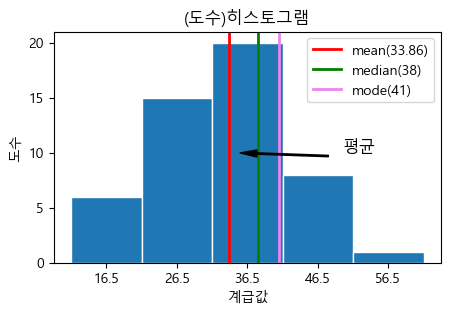

In [2]:
def make_histogram(datas, x, y, width=10):
    fig = plt.bar(x,y, width=width, edgecolor='w') # 막대그래프
    plt.xticks(ticks=x, labels=x)

    x_ = np.mean(datas)      # 평균값
    me = round(np.median(datas))    # 중앙값
    from collections import Counter 
    counts = Counter(datas)
    mo = counts.most_common(1)[0][0]  # 최빈값
    
    plt.axvline(x_, 0, max(y), 
                c='red', label=f'mean({x_})')     # # 평균값 표시
    plt.annotate('평균', xy=(x_, 10), xytext=(50,10),
                 fontsize=12,
                 arrowprops=dict(facecolor='black', width=1, shrink=0.1, headwidth=5))

    plt.axvline(me, 0, max(y), 
                c='green', label=f'median({me})') # 중앙값 표시

    plt.axvline(mo, 0, max(y), 
                c='violet', label=f'mode({mo})')  # 최빈값 표시
    
    plt.title('(도수)히스토그램')
    plt.xlabel('계급값')
    plt.ylabel('도수')
    
    plt.legend()
    plt.show()
    
    return 

x = df['계급값']
y = df['도수']
make_histogram(datas, x, y)


-------------------------

### (산술)평균(mean)

In [3]:
# 산술평균: 파이썬 기본 함수 이용

print(f'''
sum:{sum(datas)}
len:{len(datas)}
AVG:{sum(datas) / len(datas)}''')


sum:1693
len:50
AVG:33.86


In [4]:
# 산술평균: numpy 모듈 이용

import numpy as np
print('mean:', np.mean(datas))

mean: 33.86


### 중앙값(median)

In [5]:
# 중앙값 찾기:  수학적 방법

values = sorted( datas )  # 정렬하기
print(f'#정렬전: {len(datas)}개 \n{datas}')
print(f'#정렬후: {len(values)}개 \n{values}')

# 전체 개수의 짝수 or 홀수에 따른 중앙값 찾기
N = len(values)
if N%2 == 0 : # 짝수    
    M = (values[int(N/2) -1]+values[int(N/2+1) -1])/2   #인덱스를 위해 정수로 변환
    print(f'#중앙값-짝수: {M} ')
else : # 홀수
    idx = int((N+1)/2)
    M = values[idx-1]
    print(f'#중앙값-홀수: idx({idx}), {M} ')

#정렬전: 50개 
[26, 31, 28, 38, 41, 26, 18, 16, 25, 29, 39, 38, 38, 40, 43, 38, 39, 41, 41, 40, 26, 19, 39, 28, 43, 34, 21, 41, 29, 30, 12, 22, 45, 34, 29, 26, 29, 58, 42, 16, 41, 42, 38, 42, 28, 42, 39, 41, 39, 43]
#정렬후: 50개 
[12, 16, 16, 18, 19, 21, 22, 25, 26, 26, 26, 26, 28, 28, 28, 29, 29, 29, 29, 30, 31, 34, 34, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 40, 40, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 43, 43, 43, 45, 58]
#중앙값-짝수: 38.0 


In [6]:
# 중앙값 찾기: numpy 함수 이용

M = np.median(values)
print('중앙값',int(M) )

중앙값 38


### 최빈값(mode)

In [7]:
# 최빈값 찾기:  수학적 방법

values = sorted( list(set(datas)) )            # 고유값 리스트
counts = [ datas.count(i) for i in values ]   # 빈도수 리스트
print(f'#데이터별 빈도: {list(zip(values, counts))}')

# 최다 빈도 배열 만들기: 최빈값이 여러개(중복) 있을 수 있다.
maxs = [(k, v) for k, v in zip(values, counts) if max(counts)== v] 

# 최빈값이 출력하기
for (max_k, max_v) in maxs:
    print(f'#최빈값(key):{max_k}, 최빈도(value): {max_v}') 

#데이터별 빈도: [(12, 1), (16, 2), (18, 1), (19, 1), (21, 1), (22, 1), (25, 1), (26, 4), (28, 3), (29, 4), (30, 1), (31, 1), (34, 2), (38, 5), (39, 5), (40, 2), (41, 6), (42, 4), (43, 3), (45, 1), (58, 1)]
#최빈값(key):41, 최빈도(value): 6


In [8]:
# 최빈값 찾기: collections모듈의 counter 클래스 이용
from collections import Counter 

counts = Counter(datas)
counts.most_common()

print(f'#데이터별 빈도: {counts.most_common()}')
print(f'#최빈값: {counts.most_common(3)}') # 최빈값 상위 3개 

#데이터별 빈도: [(41, 6), (38, 5), (39, 5), (26, 4), (29, 4), (42, 4), (28, 3), (43, 3), (16, 2), (40, 2), (34, 2), (31, 1), (18, 1), (25, 1), (19, 1), (21, 1), (30, 1), (12, 1), (22, 1), (45, 1), (58, 1)]
#최빈값: [(41, 6), (38, 5), (39, 5)]


In [9]:
# 최빈값 찾기: scipy.stats 서브패키지 이용 mode->modal(most common)
from scipy import stats

print(f'#최빈값: { stats.mode(datas, keepdims=False)} ')

# 범주(nominal)적 (숫자가 아닌) 데이터에도 적용됨
colors = ['red', 'yellow',' blue', 'red',]
stats.mode(colors, keepdims=False)

ModuleNotFoundError: No module named 'scipy'

In [10]:
# 최빈값 찾기: numpy.unique() 사용
import numpy as np
array = np.array(datas)
values, counts = np.unique(array, return_counts=True)
index = np.argmax(counts)
print(f'#최빈값: {values[index]}, 최빈도(value): {counts[index]} ')

#최빈값: 41, 최빈도(value): 6 


In [11]:
def get_data_count(datas):
    '''데이터별 빈도'''
    values = sorted( list(set(datas)) )            # 고유값 리스트
    counts = [ datas.count(i) for i in values ]   # 빈도수 리스트
#     print(f'#데이터별 빈도: {list(zip(values, counts))}')
    return values, counts

    
def get_mode_value(datas):
    '''최다 빈도'''
    values, counts = get_data_count(datas)
    maxs = [(k, v) for k, v in zip(values, counts) if max(counts)== v] 
    return maxs

get_mode_value(datas)        # 최빈값 리스트
# get_mode_value(datas)[0][1]  # 최빈값

[(41, 6)]

-------------------------

### [실습] 예제 4-1~4-3: 조선조 왕의 수명 평균 - 딕셔너리로 표현
 1. 왕들의　평균　수명
 2. 수명이　가장　짧은　왕,　나이
 3. 수명이　가장　긴　왕，　나이
 4. 왕들의　중앙값（나이）
 5. 왕들의　최빈값（나이）

In [23]:
import operator
import numpy as np
from collections import Counter 

# 키가 중복되면 안됨, 정조가 2개임 주의!!! 
data = {'태조':73, '정조1':62, '태종':45, '세종':53, '문종':38, 
        '단종':16, '세조':51, '예종':28, '성종':37, '연산군':30,
        '중종':56, '인종':30, '명종':33, '선조':56, '광해군':66,
        '인조':54, '효종':40, '현종':33, '숙종':59, '경종': 36,
        '영조':82, '정조2':48, '순조':44, '헌종':22, '철종':32,
        '고종':67, '순종':52}

king_name = list(data.keys())
king_age = list(data.values())

#중앙값
M = np.median(king_age)

#최빈값
counts = Counter(king_age)

#평균 나이
A = np.mean(king_age)

Max = np.max(king_age)
Min = np.min(king_age)

print(f'#조선의 왕: {king_name}')
print(f'#왕들의 나이: {king_age}')
print()
print(f'#1.왕들의 평균나이   : { int(A) }세')
print(f'2.수명이 가장 짧은 왕: { Min }세')
print(f'3.수명이 가장 긴 왕  : { Max }세')
print(f'4.왕들의 중앙값(나이): { M }세')
print(f"5.왕들의 최빈값(나이): { counts.most_common() }세")

#조선의 왕: ['태조', '정조1', '태종', '세종', '문종', '단종', '세조', '예종', '성종', '연산군', '중종', '인종', '명종', '선조', '광해군', '인조', '효종', '현종', '숙종', '경종', '영조', '정조2', '순조', '헌종', '철종', '고종', '순종']
#왕들의 나이: [73, 62, 45, 53, 38, 16, 51, 28, 37, 30, 56, 30, 33, 56, 66, 54, 40, 33, 59, 36, 82, 48, 44, 22, 32, 67, 52]

#1.왕들의 평균나이   : 46세
2.수명이 가장 짧은 왕: 16세
3.수명이 가장 긴 왕  : 82세
4.왕들의 중앙값(나이): 45.0세
5.왕들의 최빈값(나이): [(30, 2), (56, 2), (33, 2), (73, 1), (62, 1), (45, 1), (53, 1), (38, 1), (16, 1), (51, 1), (28, 1), (37, 1), (66, 1), (54, 1), (40, 1), (59, 1), (36, 1), (82, 1), (48, 1), (44, 1), (22, 1), (32, 1), (67, 1), (52, 1)]세


In [13]:
# 딕셔너리 정렬하기
import operator

# value로 정렬 (key로 정렬은 itemgetter(0) )
data = sorted(data.items(), key=operator.itemgetter(1))
data

[('단종', 16),
 ('헌종', 22),
 ('예종', 28),
 ('연산군', 30),
 ('인종', 30),
 ('철종', 32),
 ('명종', 33),
 ('현종', 33),
 ('경종', 36),
 ('성종', 37),
 ('문종', 38),
 ('효종', 40),
 ('순조', 44),
 ('태종', 45),
 ('정조2', 48),
 ('세조', 51),
 ('순종', 52),
 ('세종', 53),
 ('인조', 54),
 ('중종', 56),
 ('선조', 56),
 ('숙종', 59),
 ('정조1', 62),
 ('광해군', 66),
 ('고종', 67),
 ('태조', 73),
 ('영조', 82)]

### [실습] 산술평균, 중앙값, 최빈값 사이의 관계 설명
벤처기업에 근무하는 직원  30명의 연령 자료에 대한 산술평균, 중앙값, 최빈값 사이의 관계 설명하기

In [ ]:
datas = [31, 27, 25, 24, 21, 44, 36, 29, 35, 28,
         16, 26, 21, 37, 26, 22, 30, 29, 40, 33,
         35, 26, 22, 42, 25, 28, 39, 30, 27, 30]

#평균
A = np.mean(data)
#중앙값
M = np.median(data)
#최빈값
counts = Counter(data)







---------

## <a name="4.2산포도">4.2 산포도(변이측도)</a>
중심으로부터 데이터가 흩어져 있는 정도(변이도)를 수치적으로 측정

### 산포도(measure of dispersion)

In [ ]:
import matplotlib.pyplot as plt

def make_dotGraph(data):
    #1.고유한 측정값 찾기
    idx = np.unique(data)
    val = [data.count(i) for i in idx]

    #2.계급구간 만들기
    x = np.arange(len(idx)) + 1    #X축:데이터 속성
    y = np.arange(1, max(val)+1)   #Y축:도수    
    X, Y = np.meshgrid(x,y)        #x-y 평면 범위(격자형태)

    #3.점도표 그리기
    plt.figure(figsize=(4,1)) # 그래프 사이즈
    plt.scatter(X, Y, c=Y<=val, cmap="Greys")
    plt.xticks(ticks=x, labels=idx)  #X축 레이블 지정함
    plt.show()
    
A = [1,2,3,4,5,5,5,6,7,8,8,9,9,9,9]
B = [4,5,5,5,6,6,6,6,6,6,6,7,7,7,8]

make_dotGraph(A)
make_dotGraph(B)

In [ ]:
import matplotlib.pyplot as plt

def make_graph(data): 
    idx = np.unique(data)
    val = [A.count(i) for i in idx]

    plt.bar(idx, val)
    plt.plot(idx, val, 'D', linestyle='dashdot', color='r', label=val)
    plt.xticks(ticks=idx, labels=idx)  #X축 레이블 지정함
    plt.yticks(ticks=val, labels=val)  #Y축 레이블 지정함
    plt.grid()
    plt.show()
    
A = [1,2,3,4,5,5,5,6,7,8,8,9,9,9,9]
B = [4,5,5,5,6,6,6,6,6,6,6,7,7,7,8]
    
make_graph(A)
make_graph(B)

-----------------------

### 범위(range)
R = max(x) - min(x)

In [27]:
# 범위
S = [3, 4, 6, 7, 7, 9]   # 표본

R = max(S) - min(S)  # 범위 = 최대자료값 - 최소자료값
print(f'범위(R): max({max(S)}) - min({min(S)}) = {R}')

범위(R): max(9) - min(3) = 6


------------------------------

### 사분위수 범위(interquartile range, IQR)
 - 백분위수(percentile): 수집한 자료를 크기순으로 나열할 때, 1%씩 등간격으로 구분하는 척도
 - 사분위수(quartiles): 수집한 자룔를 크기순으로 나열하여 4등분하는 척도, Q1, Q2, Q3 <br>
- **IQR = Q3 - Q1**

In [24]:
S = [16, 25, 4, 18, 11, 13, 20, 8, 11, 9]

Q1 = np.percentile(S, 25) 
Q3 = np.percentile(S, 75)
print(f'IQR = Q3({Q3}) - Q1({Q1}) = {Q3 - Q1}')

IQR = Q3(17.5) - Q1(9.5) = 8.0


In [25]:
import pandas as pd
num = pd.Series(S)

Q1 = num.quantile(.25)
Q3 = num.quantile(.75)
print(f'IQR = Q3({Q3}) - Q1({Q1}) = {Q3 - Q1}')

IQR = Q3(17.5) - Q1(9.5) = 8.0


--------

### 평균편차(mean deviation)
각 자료의 측정값과 평균과의 편차에 대한 절대값들의 평균

In [26]:
def get_mean_deviation(S, ddof=0):
    M = sum(S)/len(S)                 # 평균
    S1 = [abs(i - (M)) for i in S ]  # 평균과 측정값의 편차에 대한 절대값              
    return sum(S1) / len(S)

S = [3, 4, 6, 7, 7, 9]
print('평균편차:', round(get_mean_deviation(S), 2))

평균편차: 1.67


----------

### 분산 (Variance)
평균을 중심으로 밀집되거나 퍼짐 정도를 나타내는 척도

In [28]:
def get_variance(S, ddof=0):
    # 모분산:   ddof=0, 1/n, np.var(S)  ddof: Delta Degrees of Freedom 자유도
    # 표본분산: ddof=1, 1/n-1
    var = np.var(S, ddof=ddof)  
    return var

S = [3, 4, 6, 7, 7, 9]
print(f'#분산: {get_variance(S, ddof=0):>1.3}' ) # 모분산
print(f'#분산: {get_variance(S, ddof=1):>1.3}' ) # 표본분산

#분산: 4.0
#분산: 4.8


---------

### 표준편차(standard deviation)

In [29]:
def get_std(S, ddof=0):
    # 모표준편차:   ddof=0, 1/n, np.std(S)  ddof: Delta Degrees of Freedom 자유도
    # 표본표준편차: ddof=1, 1/n-1
    std = np.std(S, ddof=ddof)  
    return std

S = [3, 4, 6, 7, 7, 9]
print(f'#표준편차: {get_std(S, ddof=0):>1.3}' ) # 모표준편차
print(f'#표준편차: {get_std(S, ddof=1):>1.3}' ) # 표본표준편차

#표준편차: 2.0
#표준편차: 2.19


----------

### 변동계수(coefficient of variation)
 - 측정단위가 동일한 두 자료집단: 평균이 큰 차이를 보이는 두 자료집단 
 - 측정단위가 서로 다른 두 자료집단: 산포의 척도를 비교할 때 많이 사용한다.

In [ ]:
def get_cov(S, ddof=0):
    M   = np.mean(S)            # 평균
    STD = np.std(S, ddof=ddof)  # 표준편차
    cov =  STD / M * 100        #변동계수
    print('mean: %.2f'%M, 'std: %.2f'%STD) #소수점 2자리로 표현    
    
    return ( np.std(S, ddof=ddof) / np.mean(S) )* 100  #변동계수

A = [171, 164, 167, 156, 159, 164]
B = [11.5, 12.2, 12.0, 12.4, 13.6, 10.5]

print(f'#A 변동계수: ', round(get_cov(A, ddof=1), 2))
print(f'#B 변동계수: ', round(get_cov(B, ddof=1), 2) )

---------------------------

### 왜도(skewness)
- 분포의 대칭이나 비대칭의 정도를 표시하는 척도
- 정규분포로부터 얼마나 멀어져있는지를 보는 수치(왜도=0, 완전한 정규분포)
- $\alpha = 0$ :   완전한 정규분포
- $\alpha > 0$ :   왼쪽으로 치우친 분포
- $\alpha < 0$ :   오른쪽으로 치우친 분포

### 첨도(kurtosis)
- 뽀족함의 정도를 나타내는 척도
- 정규뷴포상에서 평균을 중심으로 집중화된 정도를 나타냄
- $\beta = 3$ :   뽀족한 정도가 정규분포와 같다
- $\beta > 3$ :   표준정규분포보다 정점이 높고 뽀족하다, 꼬리가 더 두꺼워짐
- $\beta < 3$ :   표준정규분포보다 정점이 낮고 완만하다, 꼬리가 더 얇아짐

In [ ]:
# 왜도 & 첨도 구하기:  수학적 방법
import numpy as np

def skew_kurtosis(data):
    mean = np.mean(data)
    var = np.var(data)
    std = np.sqrt(var)
    
    # skewness
    skew = np.sum((data - mean)**3) / (len(data) * std**3)    
    # kurtosis
    kurt = np.sum((data - mean)**4) / (len(data) * std**4) - 3
    
    return skew, kurt

datas = [31, 27, 25, 24, 21, 44, 36, 29, 35, 28,
         16, 26, 21, 37, 26, 22, 30, 29, 40, 33,
         35, 26, 22, 42, 25, 28, 39, 30, 27, 30]

skew, kurt = skew_kurtosis(datas)
print("Skewness: ", skew)
print("Kurtosis: ", kurt)

In [ ]:
# 왜도 & 첨도 구하기:  scipy.stats 모듈 사용
import scipy.stats as stats

def skew_kurtosis(data):
    # skewness & kurtosis
    skew = stats.skew(datas)
    kurtosis = stats.kurtosis(datas)
    
    return skew, kurtosis
    
# Define your data array
A = [1,2,3,4,5,5,5,6,7,8,8,9,9,9,9]
B = [4,5,5,5,6,6,6,6,6,6,6,7,7,7,8]
datas = [31, 27, 25, 24, 21, 44, 36, 29, 35, 28,
         16, 26, 21, 37, 26, 22, 30, 29, 40, 33,
         35, 26, 22, 42, 25, 28, 39, 30, 27, 30]

skew, kurt = skew_kurtosis(datas)
print("Skewness: ", skew)
print("Kurtosis: ", kurt)

In [ ]:
# values, counts =  get_data_count(datas)
# x, y = values, counts
# 도수분포표 만들기
df =  makeFrequencyTable(datas, k=6)
x, y = df['계급값'], df['도수']
make_histogram(datas, x, y, width=5)

In [ ]:
# seaborn 라이브러리로 히스토그램 그리기
import seaborn as sns 
sns.histplot(datas, kde=True, bins=5)

### [실습] 산포도 구하기
다음은 어느 정유회사에서 생산하는 자동차용 휘발유의 옥탄가 자료이다. 평균, 분산, 표준편차, 왜도, 첨도, 분포 형태 설명

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

datas=[ 90.7, 90.0, 92.2, 91.0, 88.5, 87.8, 83.4, 82.1, 88.6, 100.2,
        95.6, 93.3, 88.2, 91.0, 92.7, 93.2, 91.0, 93.4, 85.3, 88.6, 
        96.1, 98.9, 89.9, 89.8, 91.1, 89.7, 88.2, 93.7, 84.3, 97.9, 
        87.9, 90.1, 88.3, 93.3, 95.4, 91.6, 88.9, 92.6, 97.4, 87.4, 
        86.7, 90.4, 91.1, 92.6, 88.8, 89.3, 89.8, 89.2, 88.6, 89.0, 
        96.1, 95.6, 92.2 ]
#평균
x = np.mean(datas)
#분산
var = np.var(datas, ddof=0)  
#표준편차
std = np.std(datas, ddof=0)  
#왜도
skew = stats.skew(datas)
#척도
kurt = stats.kurtosis(datas)


print("1. mean              : ", round(x, 5) )
print("2. variance          : ", round(var, 5) )
print("3. standard deviation: ", round(std, 5) )
print("4. Skewness          : ", round(skew, 5) )
print("5. Kurtosis          : ", round(kurt, 5) )
print("분표 형태 설명: ")

1. mean              :  90.91887
2. variance          :  13.74115
3. standard deviation:  3.70691
4. Skewness          :  0.25306
5. Kurtosis          :  0.17784
분표 형태 설명: 


### [실습] 변동계수 비교하기
- data1 : 1부터 10 사이의 정수 100개 무작위 추출
- data2 : 평균 1 이고, 표준편차가 1인 정규분포를 이루는 100개 무작위 추출

In [36]:
import numpy as np

# 데이터 집단 먼들기
data1 = np.random.randint(1, 11, size = 100) # 1부터 10 사이의 정수 100개 무작위 추출
data2 = np.random.normal(loc = 1, scale = 1, size = 100) # 평균 1, 표준편차 1인 정규분포에서 100개 무작위 추출


print('#data1 변동계수: ', get_cov(data1, ddof=0), '%')
print('#data2 변동계수: ', get_cov(data2, ddof=0), '%')

NameError: name 'get_cov' is not defined

----------------------------------

--------

## <a name="4.3위치척도와 상자그림">4.3 위치척도와 상자그림</a>

### Z-점수
- 각 자료의 측정값을 그 측정값과 평균과의 편차를 표준편차로 나눈 수치(z-score)
- 표준점수라고도 불리우는 Z-점수는 통계학적으로 정규분포를 만들고 개개의 경우가 표준편차 상에 어떤 위치를 차지하는지를 보여주는 차원 없는 수치이다

In [40]:
import pandas as pd 

def get_z_score(data, ddof=0):
    '''z-점수'''
    x_ = round(np.mean(data), 2)   # 평균
    std= round(get_std(data, ddof=ddof), 2)        # 표준편차  
    print('x_ : ',x_, 'std: ', std)
    zdata = [ (i - x_) / std for i in data] # z-점수
    return [round(data, 2) for data in zdata]  # 소수점 절삭해서 리턴


A = [171, 164, 167, 156, 159, 164]
B = [11.5, 12.2, 12.0, 12.4, 13.6, 10.5]

# (a) 표본 A & B  z-점수
A_z = get_z_score(A, ddof=1)
df_A = pd.DataFrame([A_z], columns=A, index=['z-점수'])
df_A.columns.name = 'A자료값'
df_A

x_ :  163.5 std:  5.39


A자료값,171,164,167,156,159,164
z-점수,1.39,0.09,0.65,-1.39,-0.83,0.09


In [41]:
B_z = get_z_score(B, ddof=1)
df_B = pd.DataFrame([B_z], columns=B, index=['z-점수'])
df_B.columns.name = 'B자료값'
df_B

x_ :  12.03 std:  1.03


B자료값,11.5,12.2,12.0,12.4,13.6,10.5
z-점수,-0.51,0.17,-0.03,0.36,1.52,-1.49


-----------------------------

### 백분위수와 사분위수(percentiles & quartiles)
 - 백분위수(percentile): 수집한 자료를 크기순으로 나열할 때, 1%씩 등간격으로 구분하는 척도
 - 사분위수(quartiles): 수집한 자룔를 크기순으로 나열하여 4등분하는 척도, Q1, Q2, Q3

In [42]:
import numpy as np

datas = [26, 31, 27, 38, 42, 26, 18, 17, 25, 29,
         39, 38, 38, 40, 46, 38, 39, 41, 41, 40,
         26, 19, 39, 28, 45, 34, 21, 41, 30, 30,
         12, 22, 48, 34, 29, 26, 29, 58, 43, 16,
         42, 44, 38, 44, 28, 43, 39, 42, 39, 46]

Q1 = np.percentile(datas, 25).astype('int') # 1사분위
Q2 = np.percentile(datas, 50).astype('int')  # 2사분위
Q3 = np.percentile(datas, 75).astype('int')  # 3사분위
Q4 = np.percentile(datas, 100).astype('int') # 4사분위

print('1사분위(Q1: 25%):', Q1 )
print('2사분위(Q2: 50%):', Q2 )
print('3사분위(Q3: 75%):', Q3 )
print('4사분위(Q4:100%):', Q4 )
print(sorted(datas))

1사분위(Q1: 25%): 27
2사분위(Q2: 50%): 38
3사분위(Q3: 75%): 41
4사분위(Q4:100%): 58
[12, 16, 17, 18, 19, 21, 22, 25, 26, 26, 26, 26, 27, 28, 28, 29, 29, 29, 30, 30, 31, 34, 34, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 40, 40, 41, 41, 41, 42, 42, 42, 43, 43, 44, 44, 45, 46, 46, 48, 58]


In [ ]:
# 사분위수 범위
IQR = Q3 -Q1
print('사분위수 범위(IQR): ', IQR)

---------

### 상자그림
 - Box Plot: 사분위수를 이용하여 수집한 자료에 포함된 **특이값**을 알려주는 그림
 - 두 개 이상의 자료 집단을 비교할 때 매우 유용
 - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

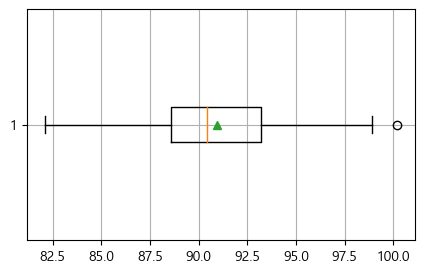

In [38]:
import matplotlib.pyplot as plt

# 가로로 그리기
plt.boxplot(datas, vert=False, showmeans=True)
plt.grid()
plt.show()

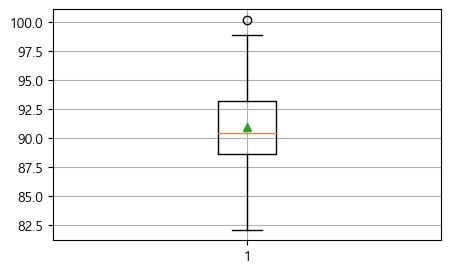

In [37]:
import matplotlib.pyplot as plt

plt.boxplot(datas, showmeans=True)
plt.grid()
plt.show()

-------------------------------------------

### [실습] 위치척도와 상자그림

data1: [56, 90, 88, 87, 68, 32, 76, 54, 100, 41]
data2: [8, 51, 70, 86, 2, 77, 81, 75, 64, 89]
data3: [15, 55, 64, 95, 67, 67, 51, 58, 57, 89]

x_ :  69.2 std:  22.81
x_ :  60.3 std:  31.16
x_ :  61.8 std:  21.84
#data1 z-점수: [-0.58, 0.91, 0.82, 0.78, -0.05, -1.63, 0.3, -0.67, 1.35, -1.24]
#data2 z-점수: [-1.68, -0.3, 0.31, 0.82, -1.87, 0.54, 0.66, 0.47, 0.12, 0.92]
#data3 z-점수: [-2.14, -0.31, 0.1, 1.52, 0.24, 0.24, -0.49, -0.17, -0.22, 1.25]

ext_outlier      : []
mid_outlier      : []
ext_outlier      : []
mid_outlier      : []
ext_outlier      : []
mid_outlier      : []


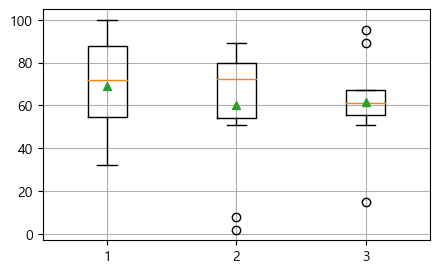

In [43]:
import numpy as np

def get_outlier_data(data):
    Q1 = np.percentile(datas, 25).astype('int') # 1사분위 (편의상 정수로 만듦)
    Q3 = np.percentile(datas, 75).astype('int')  # 3사분위
    IQR = Q3 - Q1
    fl = Q1 - 1.5*IQR  # lower inner fence
    fu = Q3 + 1.5*IQR  # upper inner fence
    fL = Q1 - 3*IQR    # lower outer fence
    fU = Q3 + 3*IQR    # upper outer fence
    mid_outlier = [x for x in datas if (fL<=x<=fl) or (fu<=x<=fU)] # mid ouetlier(보통 특이값)
    ext_outlier = [x for x in datas if (fL>=x) or (fU<=x)]         # extreme outlier(특이값)
#     print(f"ordered data     : {sorted(datas)} ")
#     print(f'lower inner fence: {fl}')
#     print(f'upper inner fence: {fu}')
#     print(f'lower outer fence: {fL}')
    print(f'ext_outlier      : {ext_outlier}')
    print(f'mid_outlier      : {mid_outlier}')    
    

    
data1 = [56,  90,  88,  87,  68,  32,  76,  54, 100,  41]  # 특이값 미 포함
data2 = [8, 51, 70, 86,  2, 77, 81, 75, 64, 89]    # (보통)특이값 포함
data3 = [15, 55, 64, 95, 67, 67, 51, 58, 57, 89]   # (보통)특이값 + 특이값 포함
print(f'data1: {data1}')
print(f'data2: {data2}')
print(f'data3: {data3}')
print()

z_score1 =  get_z_score(data1, ddof=1)   # z-점수
z_score2 =  get_z_score(data2, ddof=1)   # z-점수
z_score3 =  get_z_score(data3, ddof=1)   # z-점수
print(f'#data1 z-점수: {z_score1}')
print(f'#data2 z-점수: {z_score2}')
print(f'#data3 z-점수: {z_score3}')
print()

get_outlier_data(data1)                     # 상자그림
get_outlier_data(data2)  
get_outlier_data(data3)

plt.boxplot([data1, data2, data3], showmeans=True)
plt.grid()
plt.show()

#### 특이값(이상치) 데이터 만들기

data      : [43, 36, 25, 7, 47, 6, 23, 85, 48, 35]
특이값    : []
보통특이값: [85]


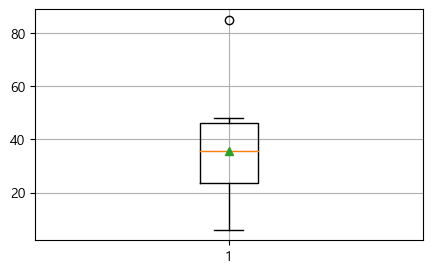

In [44]:
# 이상치 데이터 만들기
def make_outlier_data(datas):
    while True:
        datas = np.random.randint(1, 101, size=10)  # 1부터 100 사이의 정수 10개 무작위 추출
        Q1 = np.percentile(datas, 25).astype('int') # 1사분위
        Q3 = np.percentile(datas, 75).astype('int')  # 3사분위
        IQR = Q3 - Q1
        fl = Q1 - 1.5*IQR
        fu = Q3 + 1.5*IQR
        fL = Q1 - 3*IQR
        fU = Q3 + 3*IQR
        mid_outlier = [x for x in datas if (fL<=x<=fl) or (fu<=x<=fU)] # 보통 특이값
        ext_outlier = [x for x in datas if (fL>=x) or (fU<=x)] # 특이값
        
        if mid_outlier or ext_outlier:            
            break
    return list(datas), mid_outlier, ext_outlier

def draw_boxplot(data):
    plt.boxplot(data, showmeans=True)
    plt.grid()
    plt.show()

datas, mid_outlier, ext_outlier = make_outlier_data(datas)
print('data      :', datas)
print('특이값    :', ext_outlier)
print('보통특이값:', mid_outlier)
draw_boxplot(datas)

In [ ]:
#  violinplot은 분포 현황(데이터 집중) 을 알 수 있다.
plt.violinplot(datas)
plt.grid()
plt.show()

----------

## <a name="4.4도수분포표에서의 평균과 분산">4.4 도수분포표에서의 평균과 분산</a>

### 도수분포표

In [45]:
# 청소년 핸드폰 사용시간
datas = [10, 37, 22, 32, 18, 15, 15, 18, 22, 15,
        20, 25, 38, 28, 25, 30, 20, 22, 18, 22,
        22, 12, 22, 26, 22, 32, 22, 23, 20, 23,
        23, 20, 25, 51, 20, 25, 26, 22, 26, 28,
        28, 20, 23, 30, 12, 22, 35, 11, 20, 25]

# 도수분포표 만들기
df =  makeFrequencyTable(datas, k=5)
df

df.drop(columns=['상대도수','누적도수','누적상대도수'], inplace=True)
df

계급수(K):5, R:41, 계급간격(w):9, 계급시작값(s):9.5
계급:[ 9.5 18.5 27.5 36.5 45.5 54.5]


,도수,계급값
계급간격,,
9.5 ~ 18.5,10,14.0
18.5 ~ 27.5,29,23.0
27.5 ~ 36.5,8,32.0
36.5 ~ 45.5,2,41.0
45.5 ~ 54.5,1,50.0


### 도수분포표:  평균 & 분산 & 표준편차

In [46]:
# 리스트를 이용

# x_: 도수분포표 평균
x_ = sum([ df['도수'][idx] * i for idx, i in enumerate(df['계급값']) ]) / sum(df['도수'])
print(f'평균(x_): {x_}')

# x-x_: 평균차 (평균 - 계급값)
df['평균차'] = [ x - x_ for x in df['계급값'] ]


# (x-x_)**2 : 분산 (평균 - 계급값)**2
df['분산'] = [ (x - x_)**2 for x in df['계급값'] ]


# (x-x_)**2 * fi : 표준편차 (평균 - 계급값)**2*fi
df['표준편차'] = [ (x - x_)**2*i for i, x in zip(df['도수'],df['계급값']) ]


# 합계
# df.loc['합계'] = [ sum(df['도수']), '','','',sum(df['표준편차']) ]

df

평균(x_): 23.9


,도수,계급값,평균차,분산,표준편차
계급간격,,,,,
9.5 ~ 18.5,10,14.0,-9.9,98.01,980.10
18.5 ~ 27.5,29,23.0,-0.9,0.81,23.49
27.5 ~ 36.5,8,32.0,8.1,65.61,524.88
36.5 ~ 45.5,2,41.0,17.1,292.41,584.82
45.5 ~ 54.5,1,50.0,26.1,681.21,681.21


In [ ]:
# # DataFrame.apply() 이용

# # x_: 도수분포표 평균
# x_ = sum(df['계급값'] * df['도수'])/ df['도수'].sum()
# print(f'평균(x_): {x_}')


# # x-x_: 평균차 (평균 - 계급값)
# df['평균차'] = df.apply(lambda x: x['계급값'] - x_, axis=1) 


# # (x-x_)**2 : 분산 (평균 - 계급값)**2
# df['분산'] = df.apply(lambda x: (x['계급값'] - x_)**2, axis=1) 


# # (x-x_)**2 * fi : 표준편차 (평균 - 계급값)**2*fi
# df['표준편차'] = df.apply(lambda x: (x['계급값'] - x_)**2 * x['도수'], axis=1) 

# # 합계
# # df.loc['합계'] = [ sum(df['도수']), '','','',sum(df['표준편차']) ]

# df

In [47]:
fdt_var = sum(df['표준편차']) / ( sum(df['도수']) - 1 )           # 분산
fdt_std = np.sqrt( sum(df['표준편차']) / (sum(df['도수']) - 1 ) ) # 표준편차
print(f"도수분포표로부터 분산    : {fdt_var}")
print(f"도수분포표로부터 표준편차: {fdt_std}")

도수분포표로부터 분산    : 57.03061224489796
도수분포표로부터 표준편차: 7.551861508588327


---------------------------------------------------------

### [실습] 도수분포표 만들고 분산과 표준편차 추가하기

In [ ]:
# 예제1:  자동차 휘발유 옥탄가
datas=[ 90.7, 90.0, 92.2, 91.0, 88.5, 87.8, 83.4, 82.1, 88.6, 100.2,
        95.6, 93.3, 88.2, 91.0, 92.7, 93.2, 91.0, 93.4, 85.3, 88.6, 
        96.1, 98.9, 89.9, 89.8, 91.1, 89.7, 88.2, 93.7, 84.3, 97.9, 
        87.9, 90.1, 88.3, 93.3, 95.4, 91.6, 88.9, 92.6, 97.4, 87.4, 
        86.7, 90.4, 91.1, 92.6, 88.8, 89.3, 89.8, 89.2, 88.6, 89.0, 
        96.1, 95.6, 92.2 ]
'''
1. mean              :  90.91887
2. variance          :  13.74115
3. standard deviation:  3.70691
4. Skewness          :  0.25306
5. Kurtosis          :  0.17784

'''
# 도수분포표 만들기


-----------------------------------